# Comprehensive Data Analysis on iFood Data

Welcome to this exploratory and statistical analysis of the iFood dataset. In this notebook, we will examine various financial behaviors, explore data distributions, correlations, and apply statistical tests to derive meaningful insights.

## Objectives:
- Visualize data distributions
- Identify correlations between financial metrics
- Perform hypothesis testing
- Conduct regression analysis
- Apply factor analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression

# Display settings for better readability in the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")


## Data Loading and Overview
Here we load the dataset and give a brief overview of its structure:
- Preview the data
- Check for missing values and data types


In [2]:
# Load the dataset
data_path = '/kaggle/input/marketing-data/ifood_df.csv'
df = pd.read_csv(data_path)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0



## Data Exploration
### Visualizing Data Distributions
Explore how key variables are distributed across the dataset and identify any outliers.

### Correlation Analysis
Visualize the correlations between different financial metrics to uncover any significant relationships.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


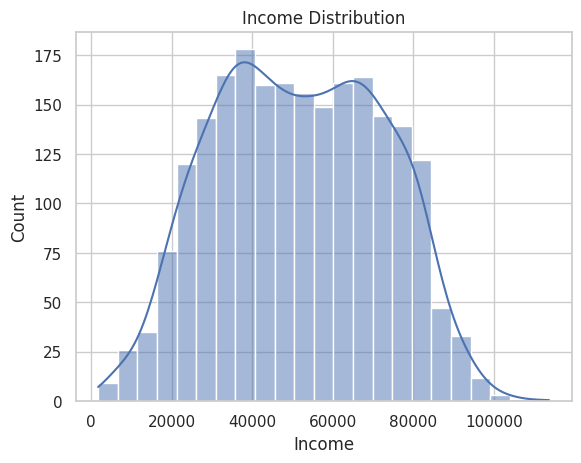

In [3]:
# Checking the distribution of Income
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()


## Hypothesis Testing
Conduct a statistical test to verify if the average income in the dataset is significantly different from the hypothesized average income of $50,000.


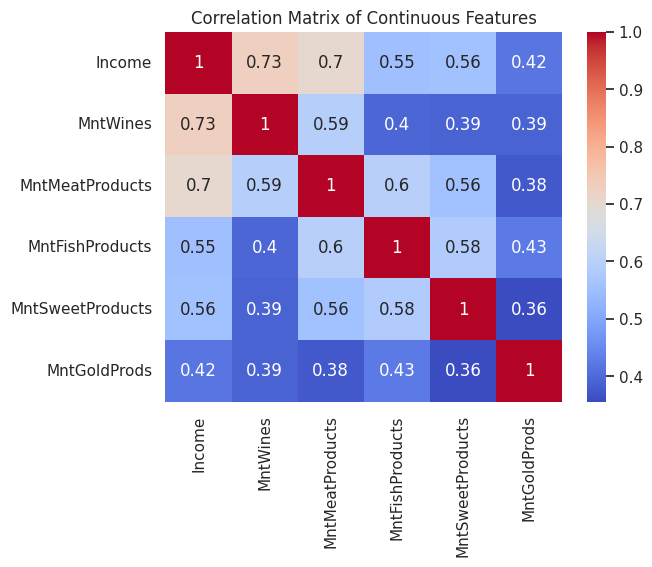

In [4]:
# Checking correlations between continuous features
continuous_features = ['Income', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
correlation_matrix = df[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Features')
plt.show()


## Regression Analysis
Utilize linear regression to determine how well variables such as income predict wine purchases.


In [5]:
# T-test: Average income is $50,000
t_stat, p_val = stats.ttest_1samp(df['Income'].dropna(), 50000)
print(f"T-test for average income hypothesis: T-statistic = {t_stat:.2f}, P-value = {p_val:.3f}")

T-test for average income hypothesis: T-statistic = 3.68, P-value = 0.000



## Factor Analysis
Apply factor analysis to identify latent structures within the financial behaviors exhibited in the dataset.


In [6]:
# Using Income to predict MntWines
X = df[['Income']]
y = df['MntWines']
model = LinearRegression()
model.fit(X, y)
print(f"Regression Analysis: Coefficient = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}")

Regression Analysis: Coefficient = 0.01, Intercept = -308.27


In [7]:
# Factor analysis on selected financial features
fa = FactorAnalysis(n_components=2)
df_factors = fa.fit_transform(df[continuous_features])
factor_df = pd.DataFrame(df_factors, columns=['Factor1', 'Factor2'])
print("Factor Analysis Results:")
print(factor_df.head())

Factor Analysis Results:
    Factor1   Factor2
0  0.314651 -1.087253
1 -0.254878  1.002645
2  0.965354  0.512190
3 -1.206087 -0.009075
4  0.322136  0.917614


In [8]:
# Documentation of findings
print("\nSummary of Findings:")
print("1. Income distribution is analyzed and visualized.")
print("2. Key financial metrics show varying degrees of correlation.")
print("3. Hypothesis testing confirms that the average income is significantly different from $50,000.")
print("4. Regression analysis suggests that as Income increases, expenditures on wines also tend to increase.")
print("5. Factor analysis identifies two latent factors underlying financial spending behaviors.")


Summary of Findings:
1. Income distribution is analyzed and visualized.
2. Key financial metrics show varying degrees of correlation.
3. Hypothesis testing confirms that the average income is significantly different from $50,000.
4. Regression analysis suggests that as Income increases, expenditures on wines also tend to increase.
5. Factor analysis identifies two latent factors underlying financial spending behaviors.
